In [114]:
import os
import pandas as pd
from datetime import datetime,timedelta
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import plotly.graph_objects as go
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import ExtraTreesRegressor

In [115]:
df = pd.read_csv('eplresults.csv')
df = df.loc[2824:]
df = df.reset_index(drop=True)

In [116]:
df.head()

,Season,DateTime,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,HST,AST,HC,AC,HF,AF,HY,AY,HR,AR
0,2000-01,2000-08-19T00:00:00Z,Charlton,Man City,4,0,H,2.0,0.0,H,...,14.0,4.0,6.0,6.0,13.0,12.0,1.0,2.0,0.0,0.0
1,2000-01,2000-08-19T00:00:00Z,Chelsea,West Ham,4,2,H,1.0,0.0,H,...,10.0,5.0,7.0,7.0,19.0,14.0,1.0,2.0,0.0,0.0
2,2000-01,2000-08-19T00:00:00Z,Coventry,Middlesbrough,1,3,A,1.0,1.0,D,...,3.0,9.0,8.0,4.0,15.0,21.0,5.0,3.0,1.0,0.0
3,2000-01,2000-08-19T00:00:00Z,Derby,Southampton,2,2,D,1.0,2.0,A,...,4.0,6.0,5.0,8.0,11.0,13.0,1.0,1.0,0.0,0.0
4,2000-01,2000-08-19T00:00:00Z,Leeds,Everton,2,0,H,2.0,0.0,H,...,8.0,6.0,6.0,4.0,21.0,20.0,1.0,3.0,0.0,0.0


In [117]:
df.isnull()

,Season,DateTime,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,HST,AST,HC,AC,HF,AF,HY,AY,HR,AR
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7905,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7906,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7907,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7908,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [118]:
df = df.drop(['DateTime', 'Season', 'Referee', 'HomeTeam', 'AwayTeam'],axis =1)

In [119]:
print(df.nunique())

FTHG    10
FTAG     9
FTR      3
HTHG     6
HTAG     6
HTR      3
HS      40
AS      31
HST     24
AST     21
HC      21
AC      20
HF      30
AF      29
HY       8
AY      10
HR       4
AR       3
dtype: int64


In [120]:
dfo = df.select_dtypes(include=['object'], exclude=['datetime'])
dfo.shape
#get levels for all variables
vn = pd.DataFrame(dfo.nunique()).reset_index()
vn.columns = ['VarName', 'LevelsCount']
vn.sort_values(by='LevelsCount', ascending =False)
vn

,VarName,LevelsCount
0,FTR,3
1,HTR,3


In [121]:
df['HTHG'] = df['HTHG'].astype(str)
df['HTAG'] = df['HTAG'].astype(str)
df['HS'] = df['HS'].astype(str)
df['AS'] = df['AS'].astype(str)
df['HST'] = df['HST'].astype(str)
df['AST'] = df['AST'].astype(str)
df['HC'] = df['HC'].astype(str)
df['AC'] = df['AC'].astype(str)
df['HF'] = df['HF'].astype(str)
df['AF'] = df['AF'].astype(str)
df['HY'] = df['HY'].astype(str)
df['AY'] = df['AY'].astype(str)
df['HR'] = df['HR'].astype(str)
df['AR'] = df['AR'].astype(str)

In [122]:
#Given that I have 17 or so features, how do I build a model to predict match outcome?
df.dtypes

FTHG     int64
FTAG     int64
FTR     object
HTHG    object
HTAG    object
HTR     object
HS      object
AS      object
HST     object
AST     object
HC      object
AC      object
HF      object
AF      object
HY      object
AY      object
HR      object
AR      object
dtype: object

In [123]:
dfo = df.select_dtypes(include=['object'], exclude=['datetime'])
dfo.shape
#get levels for all variables
vn = pd.DataFrame(dfo.nunique()).reset_index()
vn.columns = ['VarName', 'LevelsCount']
vn.sort_values(by='LevelsCount', ascending =False)
vn

,VarName,LevelsCount
0,FTR,3
1,HTHG,6
2,HTAG,6
3,HTR,3
4,HS,40
5,AS,31
6,HST,24
7,AST,21
8,HC,21
9,AC,20


In [124]:
features=['HS', 'AS', 'HST', 'AST', 'HC', 'AC', 'HF', 'AF', 'HY', 'AY', 'HR', 'AR']
dummies=pd.get_dummies(df[features])
merged=pd.concat([df,dummies],axis=1)
final=merged.drop(['HS', 'AS', 'HST', 'AST', 'HC', 'AC', 'HF', 'AF', 'HY', 'AY', 'HR', 'AR'], axis=1)
df=final
df.head()

,FTHG,FTAG,FTR,HTHG,HTAG,HTR,HS_0.0,HS_1.0,HS_10.0,HS_11.0,...,AY_7.0,AY_8.0,AY_9.0,HR_0.0,HR_1.0,HR_2.0,HR_3.0,AR_0.0,AR_1.0,AR_2.0
0,4,0,H,2.0,0.0,H,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
1,4,2,H,1.0,0.0,H,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
2,1,3,A,1.0,1.0,D,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
3,2,2,D,1.0,2.0,A,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
4,2,0,H,2.0,0.0,H,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0


In [127]:
from sklearn.model_selection import train_test_split

X= df.drop(['FTR', 'HTR'],axis=1)
y=df['FTR']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=1)

In [128]:
from sklearn import preprocessing
import numpy as np
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [129]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,roc_auc_score
from sklearn.metrics import accuracy_score,log_loss
from matplotlib import pyplot

In [130]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=300, random_state = 1,n_jobs=-1)
model_res = clf.fit(X_train_scaled, y_train)
y_pred = model_res.predict(X_test_scaled)
y_pred_prob = model_res.predict_proba(X_test_scaled)
lr_probs = y_pred_prob[:,1]
ac = accuracy_score(y_test, y_pred)

f1 = f1_score(y_test, y_pred, average='weighted')
cm = confusion_matrix(y_test, y_pred)

print('Random Forest: Accuracy=%.3f' % (ac))

print('Random Forest: f1-score=%.3f' % (f1))

Random Forest: Accuracy=0.982
Random Forest: f1-score=0.982


In [131]:
class_names=['H','A','D']

Confusion matrix, without normalization
[[437   0   4]
 [  8 373  15]
 [  0   1 744]]
Normalized confusion matrix
[[0.99 0.   0.01]
 [0.02 0.94 0.04]
 [0.   0.   1.  ]]


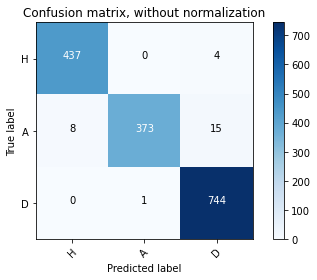

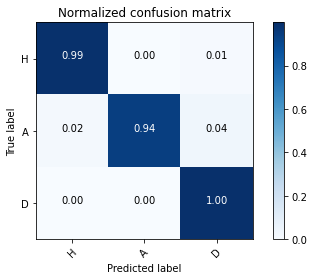

In [132]:
import itertools
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')
plt.show()

30


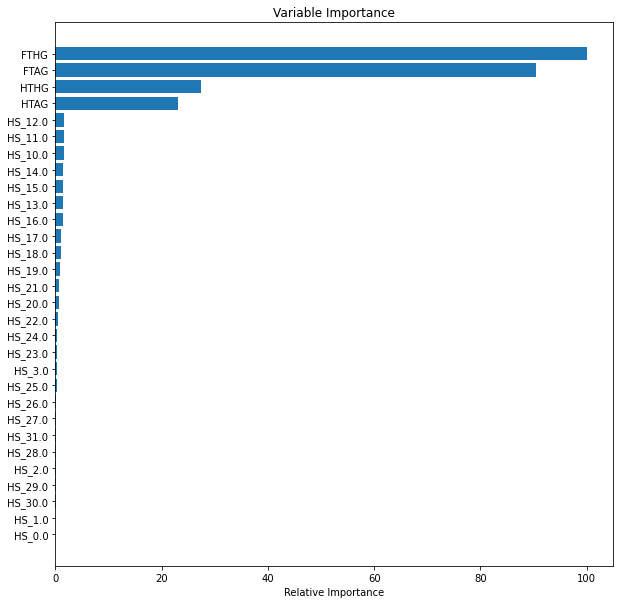

In [133]:
feature_importance = clf.feature_importances_
feature_importance = 100.0 * (feature_importance / feature_importance.max())[:30]
sorted_idx = np.argsort(feature_importance)[:30]

pos = np.arange(sorted_idx.shape[0]) + .5
print(pos.size)
sorted_idx.size
plt.figure(figsize=(10,10))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

In [134]:
# I need to adjust this to value the correct features but this is a start